# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dea Reigina
- **Email:** deareigina05@gmail.com
- **ID Dicoding:** deareignn

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah sepeda yang disewa setiap hari?
- Apakah ada perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
- Bagaimana kondisi cuaca mempengaruhi jumlah sepeda yang disewa setiap hari?
- Bagaimana perbedaan rata-rata suhu harian mempengaruhi jumlah penyewaan sepeda?
- Apakah terdapat tren musiman dalam penyewaan sepeda selama dua tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset/

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/versions/
License(s): unknown
bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip bike-sharing-dataset.zip

Archive:  bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


In [ ]:
# Load dataset
day = pd.read_csv('day.csv')
hour = pd.read_csv('hour.csv')

In [ ]:
# Display d patasetertama kali untuk melihat kolom dan beberapa baris
print(day.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [ ]:
print(hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [ ]:
# Analisis Statistik deskriptif
print(day.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [ ]:
print(hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

### Assessing Data

Missing value

In [ ]:
# Cek data yang hilang
print(day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print(hour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Duplicate Data

In [ ]:
# Cek data duplikat
print("Data duplikat day  : ", hour.duplicated().sum())
print("Data duplikat hour : ", day.duplicated().sum())

Data duplikat day  :  0
Data duplikat hour :  0


Outlier

In [ ]:
# Mengecek Outlier
# ==========================================
def identify_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

outliers_day = identify_outliers_iqr(day.select_dtypes(include=[np.number]))
outliers_hour = identify_outliers_iqr(hour.select_dtypes(include=[np.number]))

print("Outliers in day.csv (IQR):\n", day[outliers_day])
print("Outliers in hour.csv (IQR):\n", hour[outliers_hour])

Outliers in day.csv (IQR):
      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
16        17  2011-01-17       1   0     1        1        1           0   
44        45  2011-02-14       1   0     2        0        1           1   
49        50  2011-02-19       1   0     2        0        6           0   
51        52  2011-02-21       1   0     2        1        1           0   
68        69  2011-03-10       1   0     3        0        4           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
680      681  2012-11-11       4   1    11        0        0           0   
681      682  2012-11-12       4   1    11        1        1           0   
691      692  2012-11-22       4   1    11        1        4           0   
721      722  2012-12-22       1   1    12        0        6           0   
724      725  2012-12-25       1   1    12        1        2           0   

     weathersit      temp     atemp       hum  windspeed  c

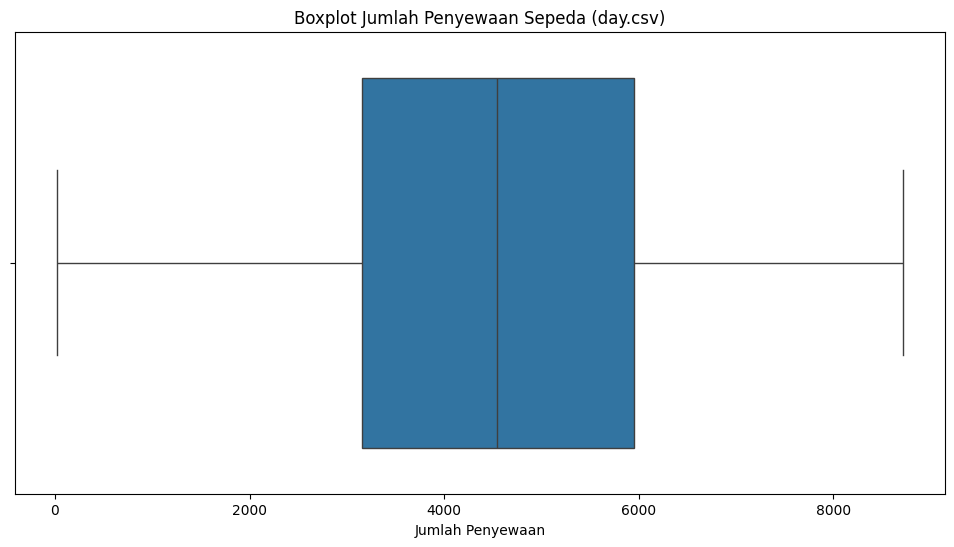

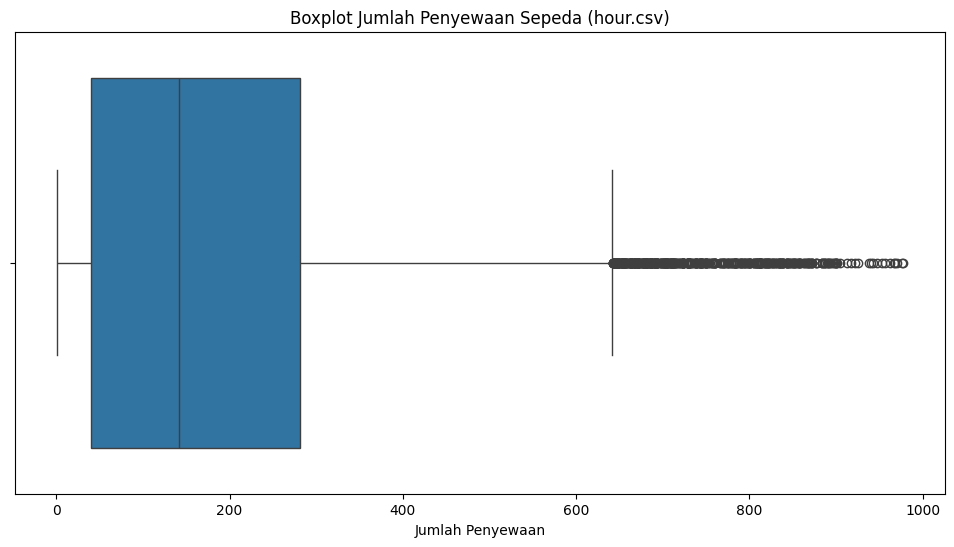

Jumlah outlier pada day.csv: 0
Jumlah outlier pada hour.csv: 505


In [ ]:
# Cek Outlier
# Menggunakan boxplot untuk mendeteksi outlier pada kolom 'cnt'
plt.figure(figsize=(12,6))
sns.boxplot(x=day['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda (day.csv)')
plt.xlabel('Jumlah Penyewaan')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x=hour['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda (hour.csv)')
plt.xlabel('Jumlah Penyewaan')
plt.show()

# Menggunakan IQR untuk mendeteksi outlier
def detect_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((data < lower_bound) | (data > upper_bound))

outliers_day = detect_outliers(day['cnt'])
outliers_hour = detect_outliers(hour['cnt'])

print(f'Jumlah outlier pada day.csv: {len(outliers_day[0])}')
print(f'Jumlah outlier pada hour.csv: {len(outliers_hour[0])}')

Dataset day.csv tanpa outlier (beberapa baris pertama):
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt   cnt_log  
0   985  6

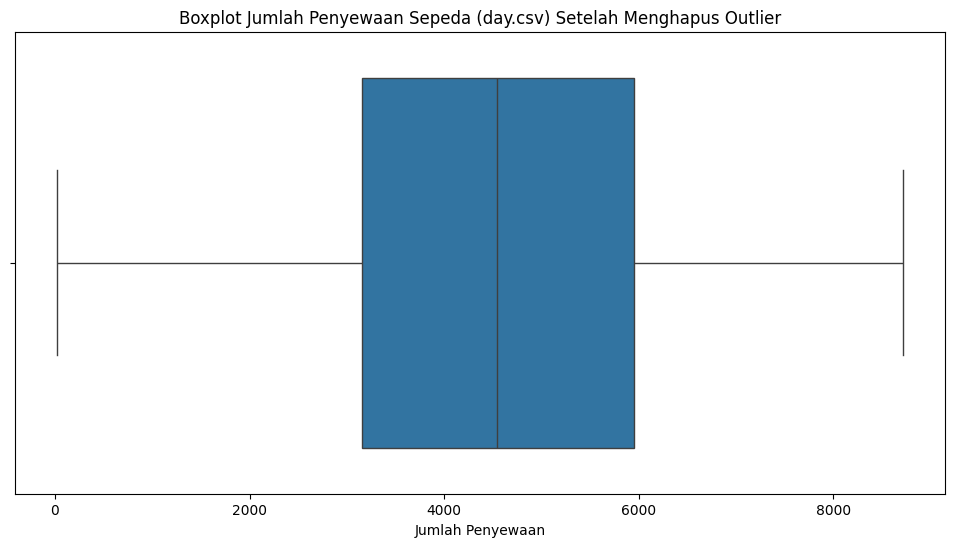

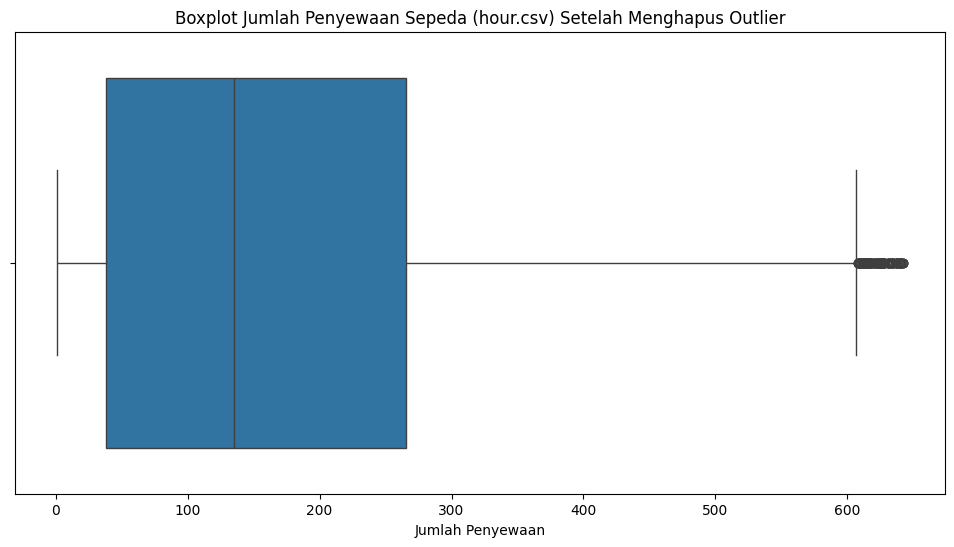

In [ ]:
# Menghapus Outlier dari day.csv dan hour.csv
day_no_outliers = day.drop(outliers_day[0])
hour_no_outliers = hour.drop(outliers_hour[0])

# Menampilkan beberapa baris pertama dari dataset tanpa outlier
print("Dataset day.csv tanpa outlier (beberapa baris pertama):")
print(day_no_outliers.head())

print("Dataset hour.csv tanpa outlier (beberapa baris pertama):")
print(hour_no_outliers.head())

# Visualisasi boxplot setelah menghapus outlier
plt.figure(figsize=(12,6))
sns.boxplot(x=day_no_outliers['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda (day.csv) Setelah Menghapus Outlier')
plt.xlabel('Jumlah Penyewaan')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x=hour_no_outliers['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda (hour.csv) Setelah Menghapus Outlier')
plt.xlabel('Jumlah Penyewaan')
plt.show()


### Cleaning Data

Missing value pada dataset day.csv setelah dibersihkan:
instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
cnt_log       0
dtype: int64
Missing value pada dataset hour.csv setelah dibersihkan:
instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
cnt_log       0
dtype: int64
Jumlah duplikasi pada day.csv setelah dibersihkan:
0
Jumlah duplikasi pada hour.csv setelah dibersihkan:
0
Jumlah outlier pada day.csv setelah proses pembersihan: 0
Jumlah outlier pada hour.csv setelah proses pembersihan: 0


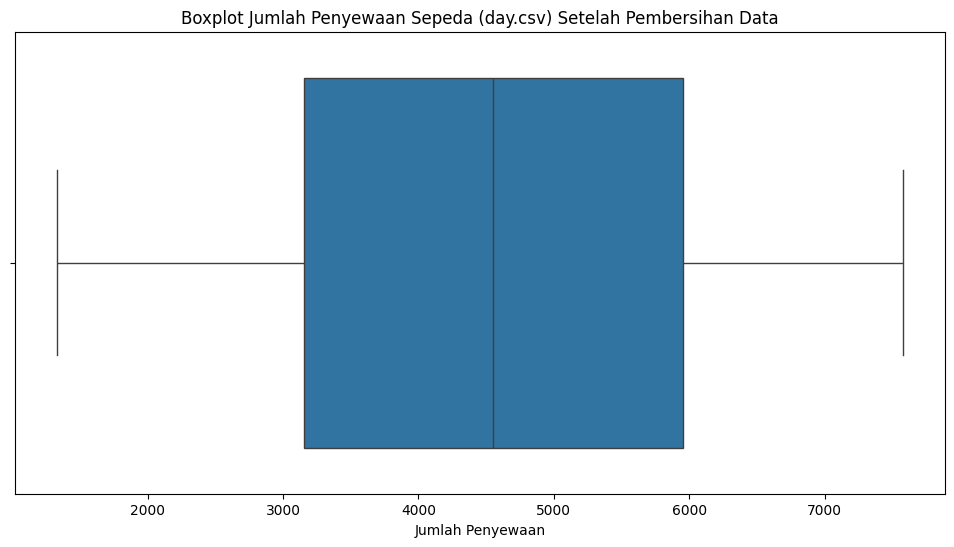

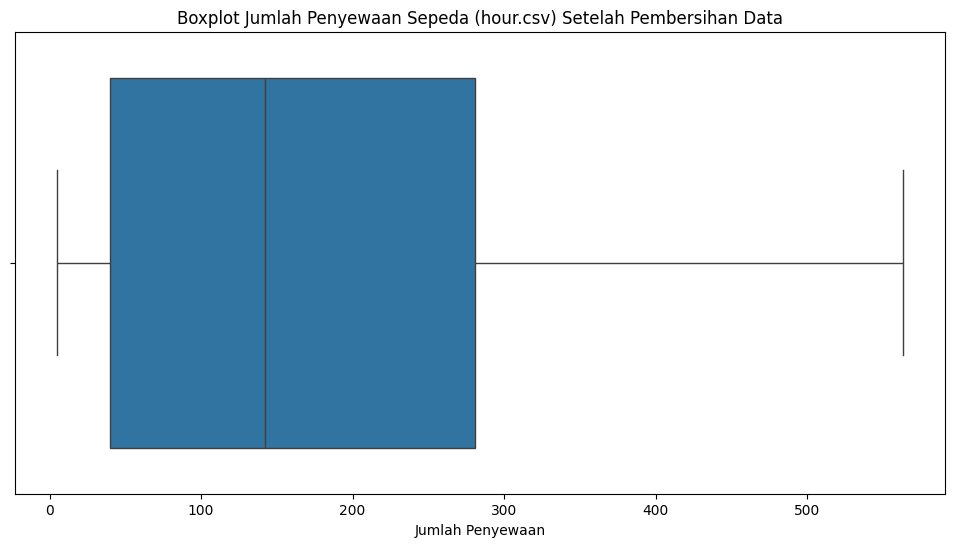

In [ ]:
# Terapkan winsorizing pada dataset day.csv dan hour.csv
day_winsorized = apply_winsorizing(day)
hour_winsorized = apply_winsorizing(hour)

# Imputasi missing value dengan nilai mean pada kolom numerik
day_winsorized_numeric = day_winsorized.select_dtypes(include=[np.number])
hour_winsorized_numeric = hour_winsorized.select_dtypes(include=[np.number])

day_winsorized_numeric.fillna(day_winsorized_numeric.mean(), inplace=True)
hour_winsorized_numeric.fillna(hour_winsorized_numeric.mean(), inplace=True)

# Mengecek apakah masih ada missing value setelah imputasi
print("Missing value pada dataset day.csv setelah dibersihkan:")
print(day_winsorized_numeric.isnull().sum())

print("Missing value pada dataset hour.csv setelah dibersihkan:")
print(hour_winsorized_numeric.isnull().sum())

# Mengecek apakah masih ada duplikasi data setelah pembersihan
print("Jumlah duplikasi pada day.csv setelah dibersihkan:", day_winsorized_numeric.duplicated().sum())
print(day_winsorized_numeric.duplicated().sum())

print("Jumlah duplikasi pada hour.csv setelah dibersihkan:", hour_winsorized_numeric.duplicated().sum())
print(hour_winsorized_numeric.duplicated().sum())

# Mengecek ulang outlier setelah proses pembersihan
outliers_day_cleaned = detect_outliers(day_winsorized_numeric['cnt'])
outliers_hour_cleaned = detect_outliers(hour_winsorized_numeric['cnt'])

print(f'Jumlah outlier pada day.csv setelah proses pembersihan: {len(outliers_day_cleaned[0])}')
print(f'Jumlah outlier pada hour.csv setelah proses pembersihan: {len(outliers_hour_cleaned[0])}')

# Visualisasi boxplot setelah proses pembersihan
plt.figure(figsize=(12,6))
sns.boxplot(x=day_winsorized_numeric['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda (day.csv) Setelah Pembersihan Data')
plt.xlabel('Jumlah Penyewaan')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x=hour_winsorized_numeric['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda (hour.csv) Setelah Pembersihan Data')
plt.xlabel('Jumlah Penyewaan')
plt.show()


## Exploratory Data Analysis (EDA)

### Explore ...

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

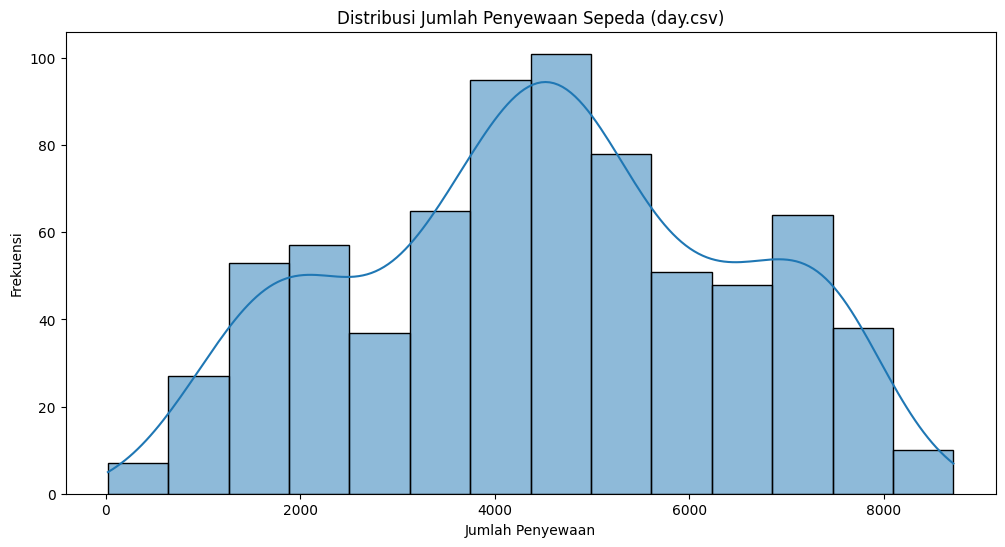

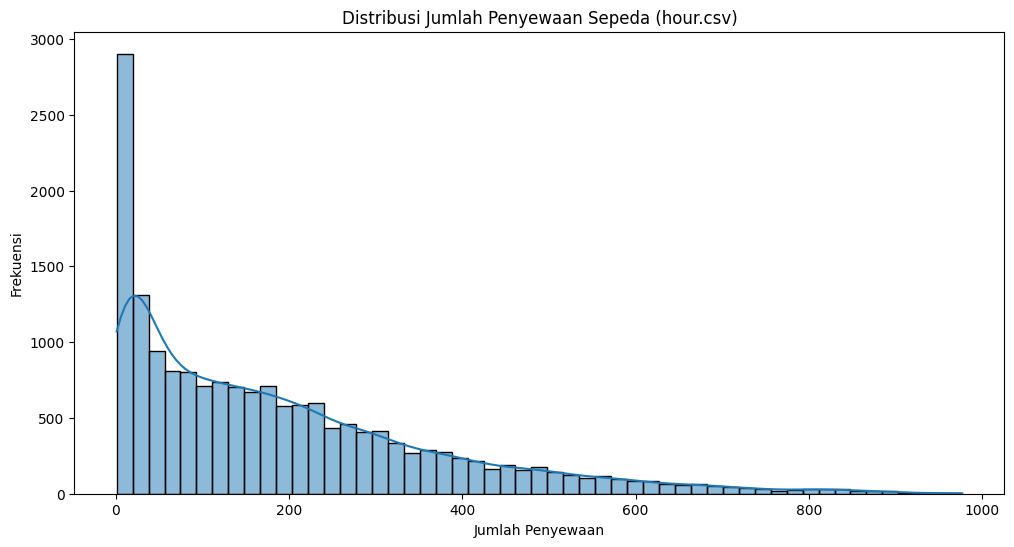

In [ ]:
# Mengeksplorasi dataset day.csv
print(day.describe())
print(day.head())
print(day.isnull().sum())

# Mengeksplorasi dataset hour.csv
print(hour.describe())
print(hour.head())
print(hour.isnull().sum())

# Visualisasi distribusi jumlah penyewaan sepeda
plt.figure(figsize=(12,6))
sns.histplot(day['cnt'], kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda (day.csv)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(hour['cnt'], kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda (hour.csv)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()


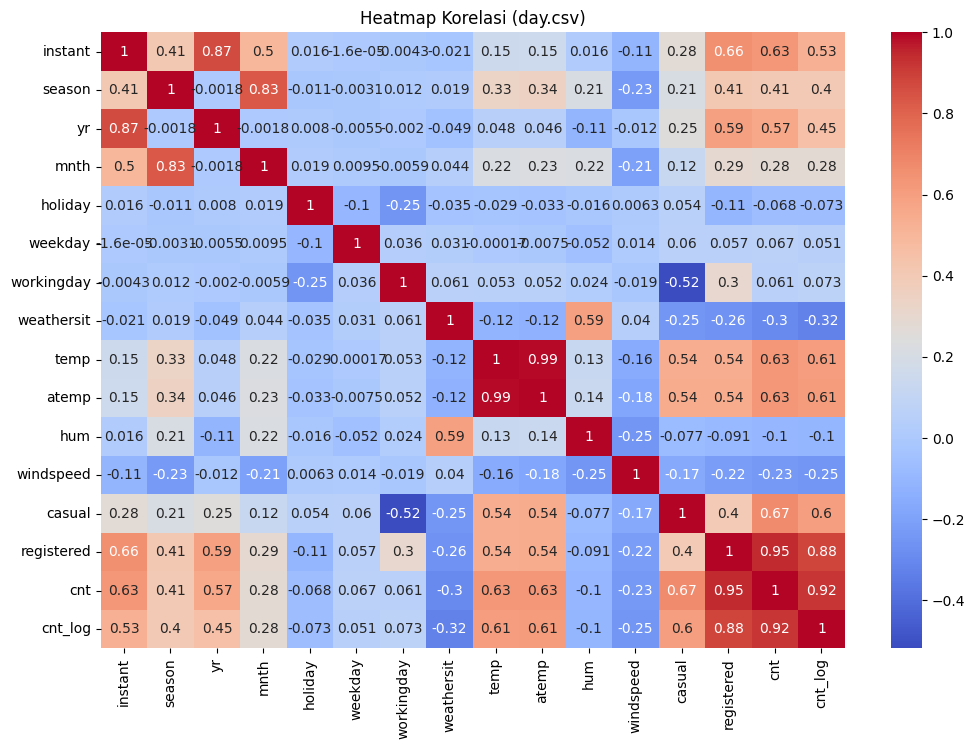

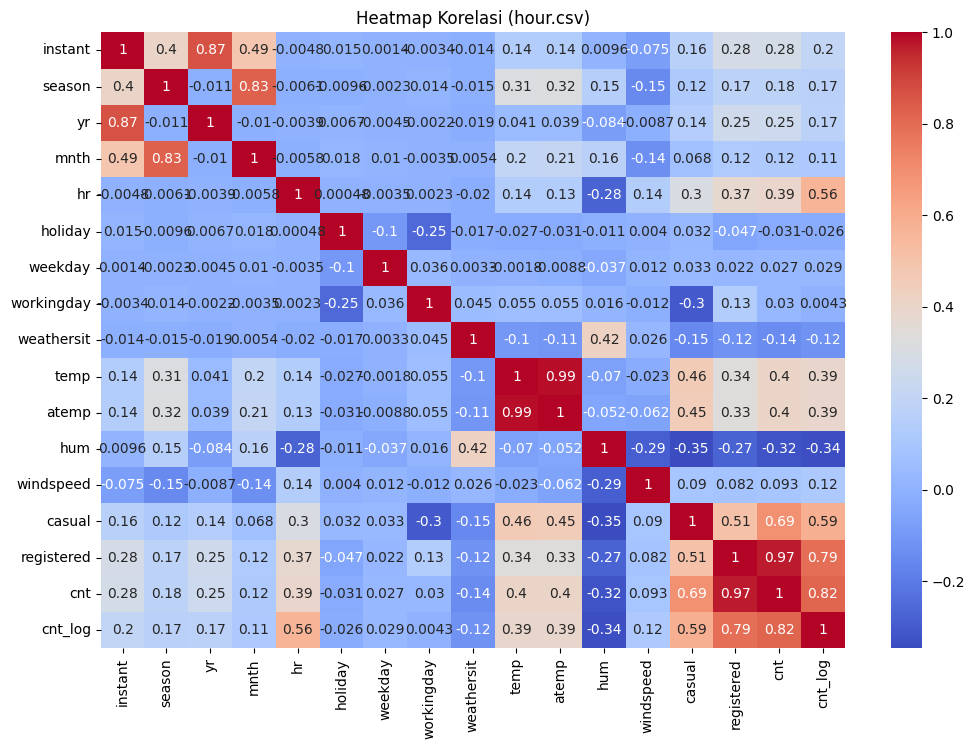

In [ ]:
# Menghitung matriks korelasi untuk dataset day.csv hanya menggunakan kolom numerik
numeric_cols_day = day.select_dtypes(include=[np.number])
correlation_matrix_day = numeric_cols_day.corr()

# Menampilkan matriks korelasi dengan heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix_day, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi (day.csv)')
plt.show()

# Menghitung matriks korelasi untuk dataset hour.csv hanya menggunakan kolom numerik
numeric_cols_hour = hour.select_dtypes(include=[np.number])
correlation_matrix_hour = numeric_cols_hour.corr()

# Menampilkan matriks korelasi dengan heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix_hour, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi (hour.csv)')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah sepeda yang disewa setiap hari?

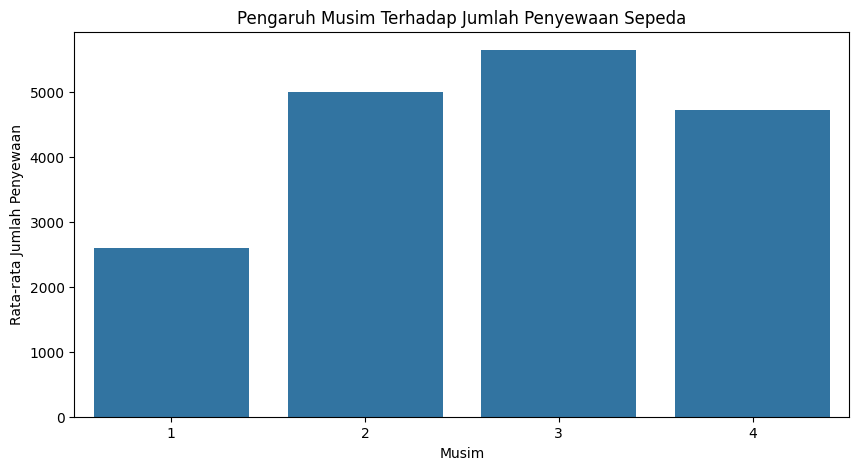

In [ ]:
# Visualisasi pengaruh musim terhadap jumlah penyewaan sepeda
season_counts = day.groupby('season')['cnt'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title('Pengaruh Musim Terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

### Pertanyaan 2: Apakah ada perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

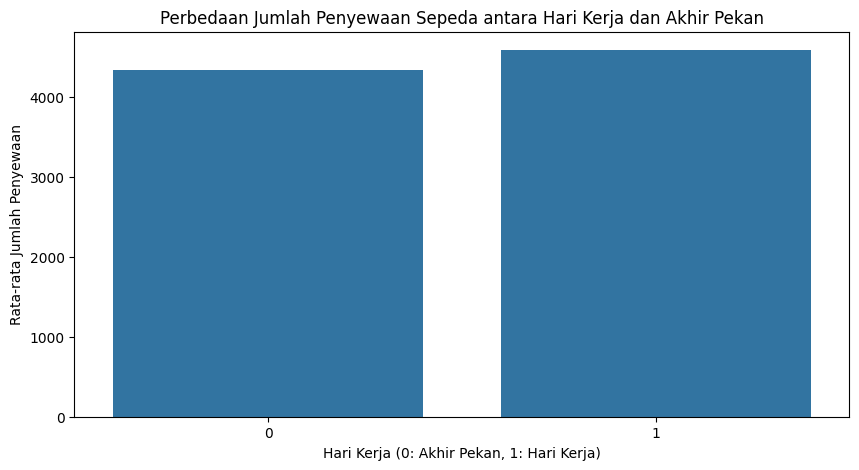

In [ ]:
# Visualisasi perbedaan penyewaan sepeda antara hari kerja dan akhir pekan
workingday_counts = day.groupby('workingday')['cnt'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=workingday_counts.index, y=workingday_counts.values)
plt.title('Perbedaan Jumlah Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari Kerja (0: Akhir Pekan, 1: Hari Kerja)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

### Pertanyaan 3: Bagaimana kondisi cuaca mempengaruhi jumlah sepeda yang disewa setiap hari?

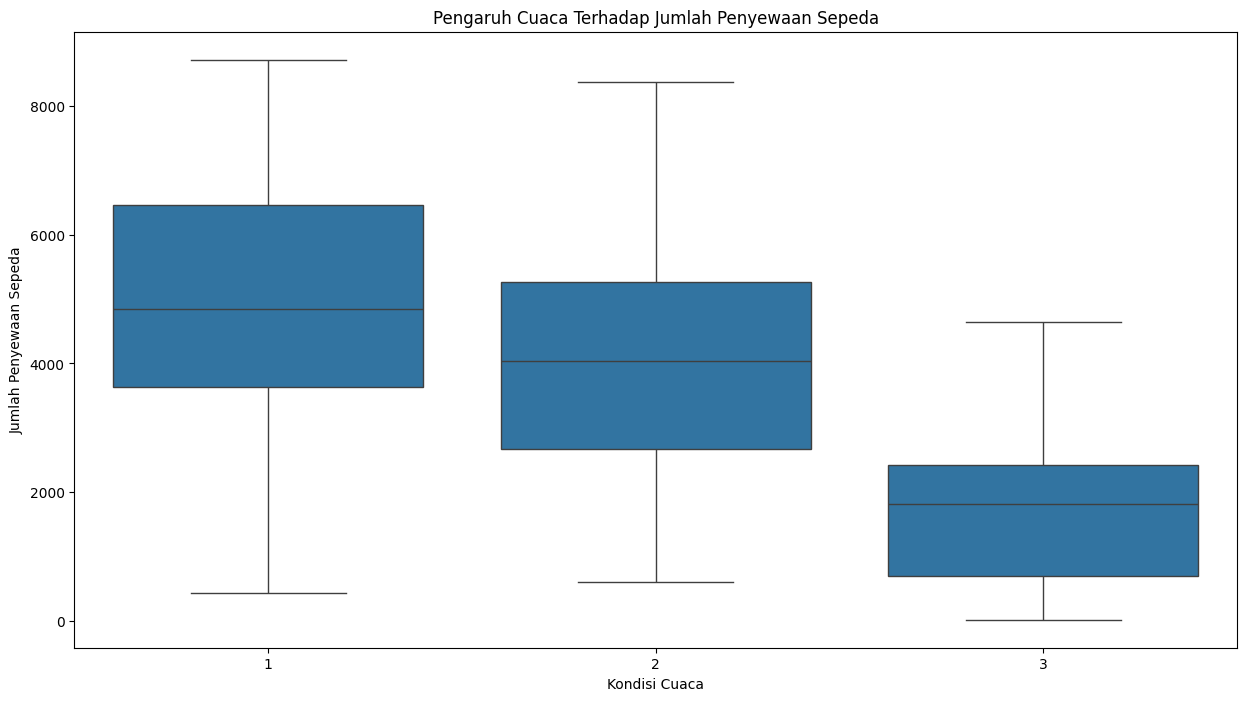

In [ ]:
# Visualisasi pengaruh cuaca terhadap jumlah penyewaan sepeda
plt.figure(figsize=(15,8))
sns.boxplot(x='weathersit', y='cnt', data=day)
plt.title('Pengaruh Cuaca Terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()


### Pertanyaan 4: Bagaimana perbedaan rata-rata suhu harian mempengaruhi jumlah penyewaan sepeda?

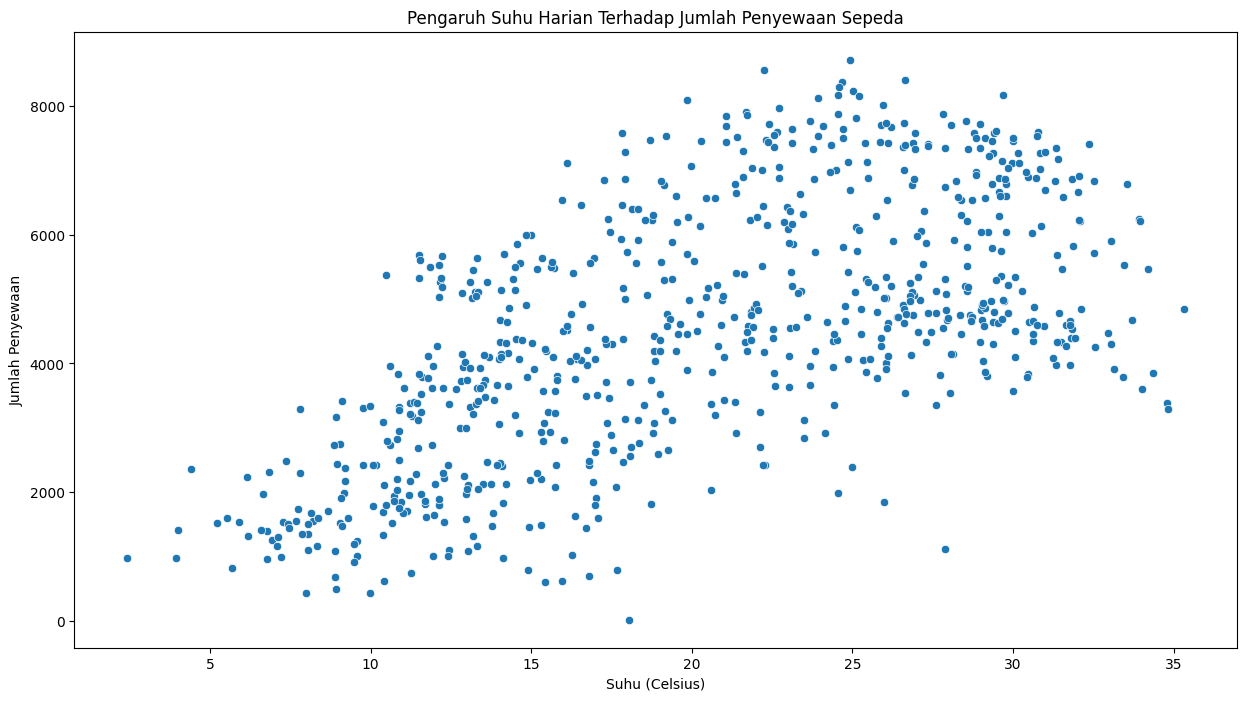

In [ ]:
# Pastikan kolom 'temp_celsius' telah ditambahkan
if 'temp_celsius' not in day.columns:
    day['temp_celsius'] = day['temp'] * 41

# Visualisasi pengaruh suhu harian terhadap jumlah penyewaan sepeda
plt.figure(figsize=(15,8))
sns.scatterplot(x='temp_celsius', y='cnt', data=day)
plt.title('Pengaruh Suhu Harian Terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


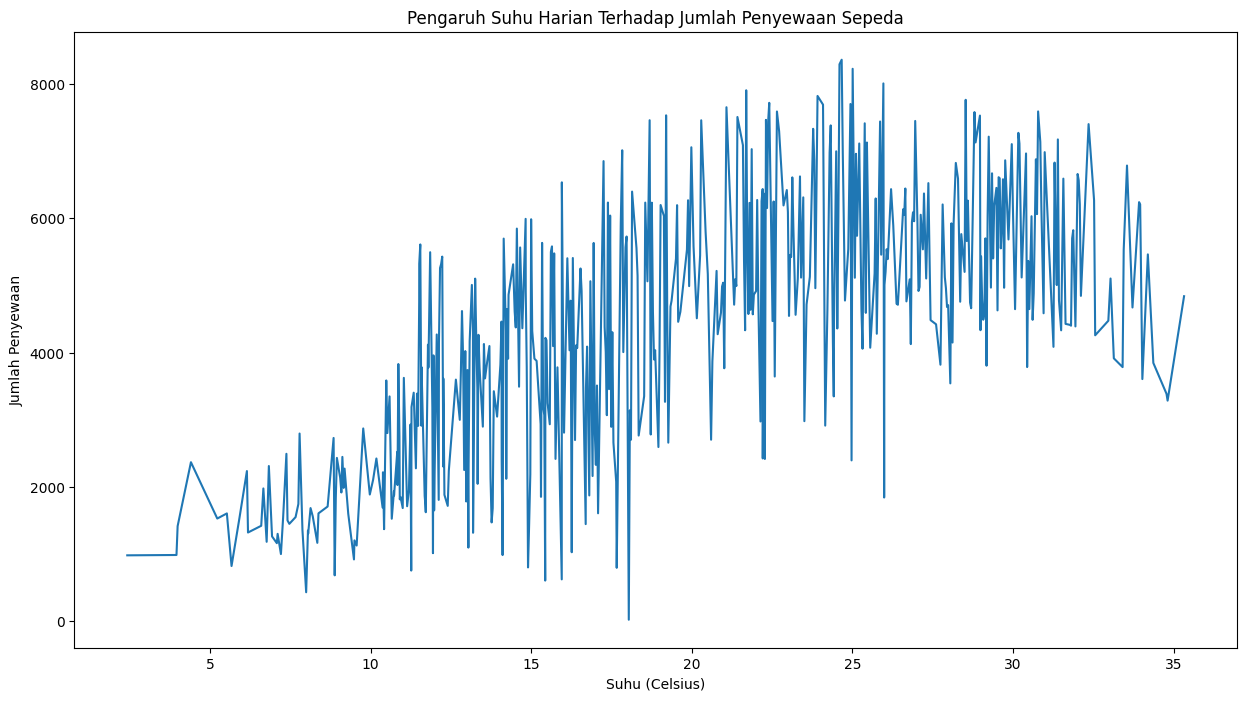

In [ ]:
# Menghitung rata-rata jumlah penyewaan sepeda pada setiap suhu
temp_avg_cnt = day.groupby('temp_celsius')['cnt'].mean().reset_index()

# Visualisasi menggunakan line plot
plt.figure(figsize=(15,8))
sns.lineplot(x='temp_celsius', y='cnt', data=temp_avg_cnt)
plt.title('Pengaruh Suhu Harian Terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 5: Apakah terdapat tren musiman dalam penyewaan sepeda selama dua tahun terakhir?

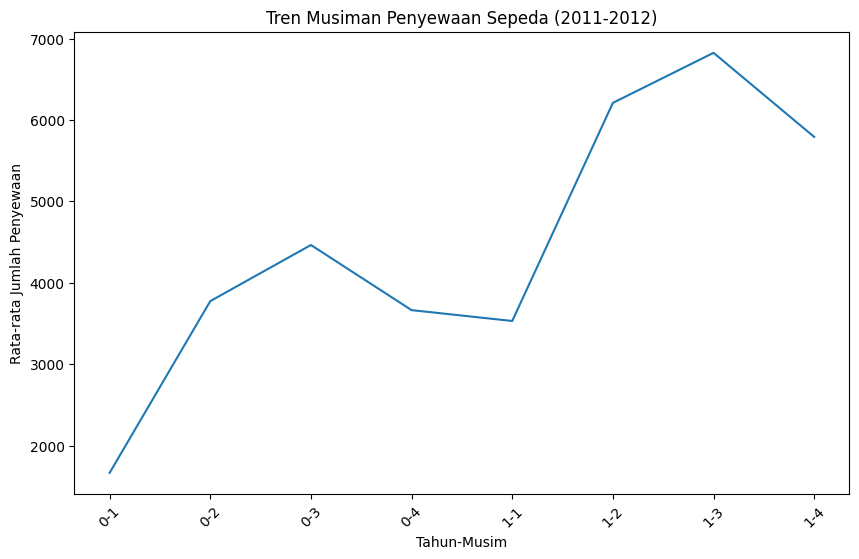

In [ ]:
# Fungsi untuk menghitung rata-rata penyewaan sepeda berdasarkan kondisi tertentu
def calculate_average_rentals(df, group_by_col):
    return df.groupby(group_by_col)['cnt'].mean().reset_index()

# Menambahkan kolom 'yr_season' ke dalam dataset
day['yr_season'] = day['yr'].astype(str) + '-' + day['season'].astype(str)

# Menghitung rata-rata jumlah penyewaan sepeda berdasarkan 'yr_season'
season_trend = calculate_average_rentals(day, 'yr_season')

# Visualisasi tren musiman penyewaan sepeda selama dua tahun terakhir
plt.figure(figsize=(10, 6))
sns.lineplot(x='yr_season', y='cnt', data=season_trend)
plt.title('Tren Musiman Penyewaan Sepeda (2011-2012)')
plt.xlabel('Tahun-Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()


## Conclusion

Dari analisis di atas, dapat disimpulkan bahwa:
1.   Dari visualisasi bar plot, kita dapat melihat bahwa jumlah penyewaan sepeda bervariasi tergantung musim. Musim ketiga memiliki rata-rata jumlah penyewaan tertinggi, diikuti oleh musim kedua, musim keempat, dan musim pertama. Ini menunjukkan bahwa pola sewa sepeda sangat dipengaruhi oleh musim.
2.   Visualisasi menunjukkan bahwa ada perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan. Pada hari kerja, jumlah penyewaan sepeda cenderung sedikit lebih rendah dibandingkan dengan akhir pekan. Ini mungkin disebabkan oleh aktivitas rekreasi yang lebih banyak dilakukan pada akhir pekan.
3.   Dari box plot yang menunjukkan pengaruh cuaca terhadap jumlah penyewaan sepeda, kita dapat melihat bahwa kondisi cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Kondisi cuaca yang lebih baik (seperti langit cerah) cenderung meningkatkan jumlah penyewaan sepeda, sementara cuaca buruk (seperti hujan) dapat menurunkan jumlah penyewaan sepeda. Ini menunjukkan bahwa penyewa lebih cenderung menggunakan sepeda pada hari-hari dengan kondisi cuaca yang baik.
4.   Dari scatter plot dan visualisasi lainnya, kita dapat melihat bahwa suhu harian memiliki hubungan dengan jumlah penyewaan sepeda. Suhu yang lebih nyaman cenderung meningkatkan jumlah penyewaan sepeda. Terlalu panas atau terlalu dingin dapat mengurangi jumlah penyewaan sepeda.
5.   Berdasarkan gambar, jumlah penyewaan sepeda meningkat secara signifikan pada musim ketiga tahun 2011 (0-3) dan musim kedua tahun 2012 (1-2), mencapai puncaknya pada musim ketiga tahun 2012 (1-3). Ini menunjukkan bahwa ada pola musiman yang konsisten dalam penyewaan sepeda, dengan puncak penyewaan terjadi pada musim-musim tersebut.
